# Early Heart Disease Prediction Detection Using Machine Learning Algorithms


## Random Forest algorithm

In [3]:
import pandas as edhd_pd
import numpy as edhd_np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from collections import Counter
import matplotlib.pyplot as edhd_plot
import seaborn as edhd_sns
import plotly.express as px
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
# Import necessary libraries for Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score, roc_curve, roc_auc_score


import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.models import Sequential, Model
from keras.optimizers import Adam

In [4]:
# loading edhd cleaned dataset

edhd_DataFrame= edhd_pd.read_csv('EDHD_Preprocessed.csv')
edhd_DataFrame

,Age,Sex,Chest Pain Type,Resting Blood Pressure,Cholesterol,Fasting Blood Sugar,Resting Electrocardiographic Results,Maximum Heart Rate Achieved,Exercise-Induced Angina,ST Depression,Slope of the Peak Exercise,Number of Vessels,Thalassemia,Heart Disease
0,63,1,0,145,233,0,2,150,0,2.3,0,0,1,1
1,37,1,2,130,250,1,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,1,2,172,0,1.4,2,0,2,1
3,56,1,1,120,236,1,1,178,0,0.8,2,0,2,1
4,57,0,3,120,354,1,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,3,140,241,1,1,123,1,0.2,1,0,3,0
299,45,1,0,110,264,1,1,132,0,1.2,1,0,3,0
300,68,1,3,144,193,0,1,141,0,3.4,1,2,3,0
301,57,1,3,130,131,1,1,115,1,1.2,1,1,3,0


In [5]:
# Strip leading/trailing spaces from column names
edhd_DataFrame.columns = edhd_DataFrame.columns.str.strip()

ind_features = edhd_DataFrame.drop(columns = ['Heart Disease'],axis =1)
X = ind_features
dep_features = edhd_DataFrame['Heart Disease']
y = dep_features

In [6]:
Counter(y)

Counter({1: 165, 0: 138})

In [7]:
edhd_X_trainValue, edhd_X_textValue, edhd_y_trainValue, edhd_y_textValue = train_test_split(X, y, test_size = 0.25, random_state = 5)

In [8]:
# Train the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust the number of trees
rf.fit(edhd_X_trainValue, edhd_y_trainValue)

RandomForestClassifier(random_state=42)

In [9]:
# Make predictions
y_pred = rf.predict(edhd_X_textValue)

In [10]:
# Evaluate the model
accuracy = accuracy_score(edhd_y_textValue, y_pred)
conf_matrix = confusion_matrix(edhd_y_textValue, y_pred)
class_report = classification_report(edhd_y_textValue, y_pred)

In [11]:
# Display the evaluation results
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.881578947368421
Confusion Matrix:
[[32  6]
 [ 3 35]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.84      0.88        38
           1       0.85      0.92      0.89        38

    accuracy                           0.88        76
   macro avg       0.88      0.88      0.88        76
weighted avg       0.88      0.88      0.88        76



In [12]:

# Model building
RFmodel = RandomForestClassifier()
RFmodel.fit(edhd_X_trainValue, edhd_y_trainValue)



RandomForestClassifier()

In [13]:
# Predicting the values
predictedValue_y = RFmodel.predict(edhd_X_textValue)
rf_accuracy = accuracy_score(edhd_y_textValue, predictedValue_y)

# Print accuracy for train and test datasets
print(f"Acc for Train of Random Forest is {accuracy_score(edhd_y_trainValue, RFmodel.predict(edhd_X_trainValue))}")
print(f"Acc for Test of Random Forest is {rf_accuracy} \n")



Acc for Train of Random Forest is 1.0
Acc for Test of Random Forest is 0.8947368421052632 



In [14]:
# Confusion matrix
cm = confusion_matrix(edhd_y_textValue, RFmodel.predict(edhd_X_textValue))
cm

array([[33,  5],
       [ 3, 35]])

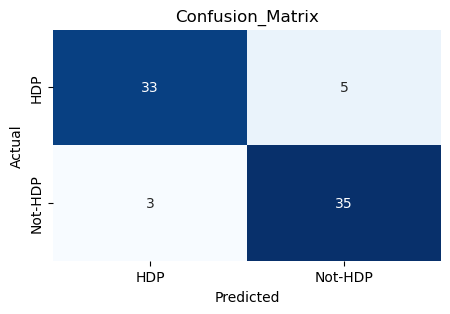

In [15]:

edhd_plot.figure(figsize=(5, 3))
edhd_sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['HDP', 'Not-HDP'], yticklabels=['HDP', 'Not-HDP'])
edhd_plot.title('Confusion_Matrix')
edhd_plot.xlabel('Predicted')
edhd_plot.ylabel('Actual')
edhd_plot.show()

In [16]:

print("\nClassification Report:")
print(classification_report(edhd_y_textValue, predictedValue_y))

print("\nPrecision, Recall, F1-Score:")
print(f"Precision: {precision_score(edhd_y_textValue, predictedValue_y, average='weighted')}")
print(f"Recall: {recall_score(edhd_y_textValue, predictedValue_y, average='weighted')}")
print(f"F1-Score: {f1_score(edhd_y_textValue, predictedValue_y, average='weighted')}")



Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.87      0.89        38
           1       0.88      0.92      0.90        38

    accuracy                           0.89        76
   macro avg       0.90      0.89      0.89        76
weighted avg       0.90      0.89      0.89        76


Precision, Recall, F1-Score:
Precision: 0.8958333333333333
Recall: 0.8947368421052632
F1-Score: 0.8946638946638946


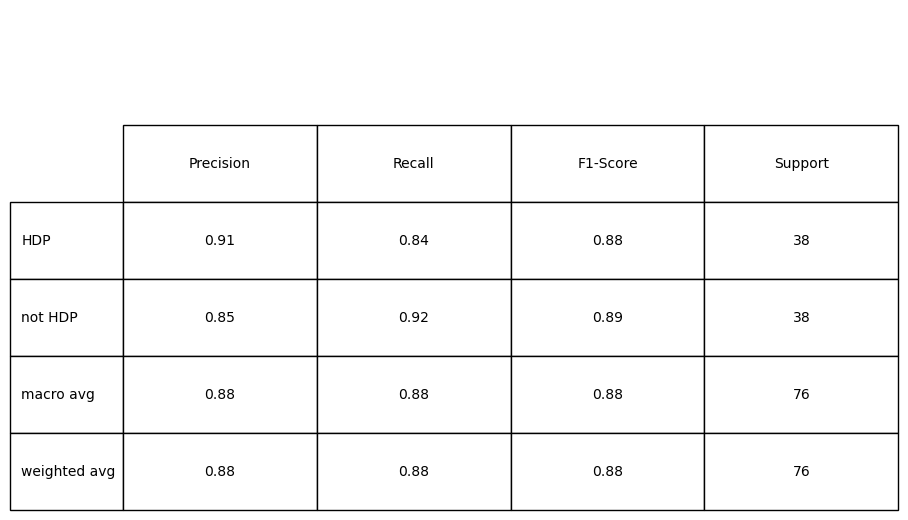

In [17]:
dataLines = class_report.split('\n')
classes = ['HDP','not HDP','macro avg','weighted avg']
table_data = []

for eachLine in dataLines[2:]:
    if eachLine.strip() and not eachLine.strip().startswith(('accuracy')):  # Check if the line is not empty
        t = eachLine.split()
        v = []
        for x in t[1:]:
            if (x != 'avg'):
                v.append(x)
        table_data.append(v)
table_data

fig, ax_svc = edhd_plot.subplots(figsize=(10, 5))
ax_svc.axis('off')

ax_svc.table(cellText=table_data, colLabels=['Precision', 'Recall', 'F1-Score', 'Support'],
         rowLabels=classes, cellLoc='center', loc='top',
         bbox=[0, -0.3, 1, 1])
edhd_plot.show()


ROC AUC Score: 0.9581024930747922


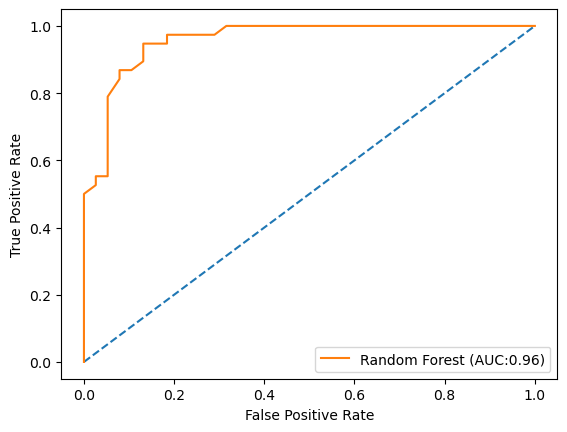

In [18]:
# Plotting the area under the Receiver Operating Characteristic (ROC) curve
prob_value = RFmodel.predict_proba(edhd_X_textValue)[:,1]
auc_rf = roc_auc_score(edhd_y_textValue, prob_value)
fpr, tpr, threshold = roc_curve(edhd_y_textValue, prob_value)

# Optionally, calculate and print ROC AUC score if applicable
if len(set(edhd_y_trainValue)) == 2:  # Ensure binary classification
    probas = RFmodel.predict_proba(edhd_X_textValue)
    roc_auc = roc_auc_score(edhd_y_textValue, probas[:, 1])
    print(f"\nROC AUC Score: {roc_auc}")
    
# Plotting the ROC curve
edhd_plot.plot([0, 1], [0, 1], linestyle='--')
edhd_plot.plot(fpr, tpr, label='%s (AUC:%0.2f)' % ('Random Forest', auc_rf))
edhd_plot.xlabel('False Positive Rate')
edhd_plot.ylabel('True Positive Rate')
edhd_plot.legend(loc='lower right')
edhd_plot.show()

